# Using Pandas for Structured Data

### Question: What were the sales at any particular store?

[Rossmann Datafile](http://files.fast.ai/part2/lesson14/rossmann.tgz)

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.structured import *
from fastai.column_data import *
from pathlib import Path

In [3]:
PATH = Path("data/rossmann")

In [4]:
files = list(PATH.iterdir())
files

[PosixPath('data/rossmann/weather.csv'),
 PosixPath('data/rossmann/train.csv'),
 PosixPath('data/rossmann/test.csv'),
 PosixPath('data/rossmann/store.csv'),
 PosixPath('data/rossmann/googletrend.csv'),
 PosixPath('data/rossmann/sample_submission.csv'),
 PosixPath('data/rossmann/state_names.csv'),
 PosixPath('data/rossmann/store_states.csv')]

### Process for getting a list of filenames using Pathlib

In [5]:
files[0]

PosixPath('data/rossmann/weather.csv')

In [6]:
str(files[0])

'data/rossmann/weather.csv'

In [7]:
str(files[0])[14:-4]

'weather'

In [114]:
table_names = [str(file)[14:-4] for file in files]
table_names.sort()
table_names

['googletrend',
 'sample_submission',
 'state_names',
 'store',
 'store_states',
 'test',
 'train',
 'weather']

In [9]:
#Removing sample_submission as it is not required
table_names.remove('sample_submission')

In [10]:
table_names

['googletrend',
 'state_names',
 'store',
 'store_states',
 'test',
 'train',
 'weather']

### Creating a list of dataframes

In [116]:
gtrend = table_names[0]

In [119]:
pd.read_csv(Path(PATH/gtrend).with_suffix('.csv')).head()

,file,week,trend
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67


In [11]:
tables = [pd.read_csv(Path(PATH/table).with_suffix('.csv'), low_memory=False) for table in table_names]

In [12]:
#Displays dataframes as a HTML table
from IPython.display import display

In [13]:
for table in tables:
    display(table.head())

,file,week,trend
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67


,StateName,State
0,BadenWuerttemberg,BW
1,Bayern,BY
2,Berlin,BE
3,Brandenburg,BB
4,Bremen,HB


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


,Store,State
0,1,HE
1,2,TH
2,3,NW
3,4,BE
4,5,SN


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,...,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,NordrheinWestfalen,2013-01-01,8,4,2,7,5,1,94,87,...,31.0,12.0,4.0,39,26,58.0,5.08,6.0,Rain,215
1,NordrheinWestfalen,2013-01-02,7,4,1,5,3,2,93,85,...,31.0,14.0,10.0,24,16,NaN,0.00,6.0,Rain,225
2,NordrheinWestfalen,2013-01-03,11,8,6,10,8,4,100,93,...,31.0,8.0,2.0,26,21,NaN,1.02,7.0,Rain,240
3,NordrheinWestfalen,2013-01-04,9,9,8,9,9,8,100,94,...,11.0,5.0,2.0,23,14,NaN,0.25,7.0,Rain,263
4,NordrheinWestfalen,2013-01-05,8,8,7,8,7,6,100,94,...,10.0,6.0,3.0,16,10,NaN,0.00,7.0,Rain,268


### Summary statistics for all the tables

In [14]:
#.describe is a built in Pandas method
tables[0].describe()

,trend
count,2072.000000
mean,63.814189
std,12.650246
min,0.000000
25%,55.000000
50%,64.000000
75%,72.000000
max,100.000000


In [15]:
#DataFrameSummary extends the functionality of the describe method
for table in tables:
    display(DataFrameSummary(table).summary())

,file,week,trend
count,NaN,NaN,2072
mean,NaN,NaN,63.8142
std,NaN,NaN,12.6502
min,NaN,NaN,0
25%,NaN,NaN,55
50%,NaN,NaN,64
75%,NaN,NaN,72
max,NaN,NaN,100
counts,2072,2072,2072
uniques,14,148,68


,StateName,State
count,16,16
unique,16,16
top,Niedersachsen,TH
freq,1,1
counts,16,16
uniques,16,16
missing,0,0
missing_perc,0%,0%
types,unique,unique


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115,NaN,NaN,1112,761,761,1115,571,571,NaN
mean,558,NaN,NaN,5404.9,7.2247,2008.67,0.512108,23.5954,2011.76,NaN
std,322.017,NaN,NaN,7663.17,3.21235,6.19598,0.500078,14.142,1.67494,NaN
min,1,NaN,NaN,20,1,1900,0,1,2009,NaN
25%,279.5,NaN,NaN,717.5,4,2006,0,13,2011,NaN
50%,558,NaN,NaN,2325,8,2010,1,22,2012,NaN
75%,836.5,NaN,NaN,6882.5,10,2013,1,37,2013,NaN
max,1115,NaN,NaN,75860,12,2015,1,50,2015,NaN
counts,1115,1115,1115,1112,761,761,1115,571,571,571
uniques,1115,4,3,654,12,23,2,24,7,3


,Store,State
count,1115,NaN
mean,558,NaN
std,322.017,NaN
min,1,NaN
25%,279.5,NaN
50%,558,NaN
75%,836.5,NaN
max,1115,NaN
counts,1115,1115
uniques,1115,12


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
count,41088,41088,41088,NaN,41077,41088,NaN,41088
mean,20544.5,555.9,3.97917,NaN,0.854322,0.395833,NaN,0.443487
std,11861.2,320.274,2.01548,NaN,0.352787,0.489035,NaN,0.496802
min,1,1,1,NaN,0,0,NaN,0
25%,10272.8,279.75,2,NaN,1,0,NaN,0
50%,20544.5,553.5,4,NaN,1,0,NaN,0
75%,30816.2,832.25,6,NaN,1,1,NaN,1
max,41088,1115,7,NaN,1,1,NaN,1
counts,41088,41088,41088,41088,41077,41088,41088,41088
uniques,41088,856,7,48,2,2,2,2


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.01721e+06,1.01721e+06,NaN,1.01721e+06,1.01721e+06,1.01721e+06,1.01721e+06,NaN,1.01721e+06
mean,558.43,3.99834,NaN,5773.82,633.146,0.830107,0.381515,NaN,0.178647
std,321.909,1.99739,NaN,3849.93,464.412,0.375539,0.485759,NaN,0.383056
min,1,1,NaN,0,0,0,0,NaN,0
25%,280,2,NaN,3727,405,1,0,NaN,0
50%,558,4,NaN,5744,609,1,0,NaN,0
75%,838,6,NaN,7856,837,1,1,NaN,0
max,1115,7,NaN,41551,7388,1,1,NaN,1
counts,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209
uniques,1115,7,942,21734,4086,2,2,4,2


,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,...,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
count,NaN,NaN,15840,15840,15840,15840,15840,15840,15840,15840,...,15459,15459,15459,15840,15840,3604,15840,14667,NaN,15840
mean,NaN,NaN,14.6441,10.389,6.19899,8.58782,6.20581,3.62614,93.6596,74.2829,...,24.0576,12.2398,7.02516,22.7666,11.9722,48.8643,0.831718,5.55131,NaN,175.897
std,NaN,NaN,8.64601,7.37926,6.52639,6.24478,6.08677,6.12839,7.67853,13.4866,...,8.9768,5.06794,4.9806,8.98862,5.87284,13.027,2.51351,1.68771,NaN,101.589
min,NaN,NaN,-11,-13,-15,-14,-15,-73,44,30,...,0,0,0,3,2,21,0,0,NaN,-1
25%,NaN,NaN,8,4,1,4,2,-1,90.75,65,...,14,10,3,16,8,39,0,5,NaN,80
50%,NaN,NaN,15,11,7,9,7,4,94,76,...,31,11,7,21,11,48,0,6,NaN,202
75%,NaN,NaN,21,16,11,13,11,8,100,85,...,31,14,10,27,14,55,0.25,7,NaN,256
max,NaN,NaN,39,31,24,25,20,19,100,100,...,31,31,31,101,53,111,58.93,8,NaN,360
counts,15840,15840,15840,15840,15840,15840,15840,15840,15840,15840,...,15459,15459,15459,15840,15840,3604,15840,14667,11889,15840
uniques,16,990,51,45,40,40,36,40,53,71,...,24,32,24,44,29,47,41,9,21,362


### Dataframe selection methods

https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

In [16]:
table_names

['googletrend',
 'state_names',
 'store',
 'store_states',
 'test',
 'train',
 'weather']

In [17]:
#Stores each table as a variable
googletrend, state_names, store, store_states, test, train, weather = tables

In [18]:
googletrend.head()

,file,week,trend
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67


In [19]:
googletrend.columns

Index(['file', 'week', 'trend'], dtype='object')

In [20]:
#Accessing a column in a dataframe
googletrend.week[0:5]

0    2012-12-02 - 2012-12-08
1    2012-12-09 - 2012-12-15
2    2012-12-16 - 2012-12-22
3    2012-12-23 - 2012-12-29
4    2012-12-30 - 2013-01-05
Name: week, dtype: object

In [21]:
#Using .loc
googletrend.loc[0:5,'week']

0    2012-12-02 - 2012-12-08
1    2012-12-09 - 2012-12-15
2    2012-12-16 - 2012-12-22
3    2012-12-23 - 2012-12-29
4    2012-12-30 - 2013-01-05
5    2013-01-06 - 2013-01-12
Name: week, dtype: object

In [127]:
#Using .iloc
googletrend.iloc[0:5, 1]

0    2012-12-02 - 2012-12-08
1    2012-12-09 - 2012-12-15
2    2012-12-16 - 2012-12-22
3    2012-12-23 - 2012-12-29
4    2012-12-30 - 2013-01-05
Name: week, dtype: object

### Dateparts

In [23]:
#Spot checking the first value of the week column in the googletrend df
googletrend.week[0]

'2012-12-02 - 2012-12-08'

In [24]:
#Spot checking the type
type(googletrend.week[0])

str

In [25]:
#On a string we can access string methods directly
googletrend.week[0].split(' - ')

['2012-12-02', '2012-12-08']

In [26]:
type(googletrend.week)

pandas.core.series.Series

In [27]:
#On a series, we can use the .str method to access string methods
googletrend.week.str.split(' - ')[0]

['2012-12-02', '2012-12-08']

In [28]:
#Makes a new column 'Date' and takes the first value of the split
googletrend['Date'] = googletrend.week.str.split(' - ', expand=True)[0]
googletrend.head()

,file,week,trend,Date
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96,2012-12-02
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95,2012-12-09
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91,2012-12-16
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48,2012-12-23
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67,2012-12-30


In [29]:
googletrend.dtypes

file     object
week     object
trend     int64
Date     object
dtype: object

In [30]:
#Adding dateparts
add_datepart(googletrend, "Date", drop=False)
googletrend.head()

,file,week,trend,Date,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96,2012-12-02,2012,12,48,2,6,337,False,False,False,False,False,False,1354406400
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95,2012-12-09,2012,12,49,9,6,344,False,False,False,False,False,False,1355011200
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91,2012-12-16,2012,12,50,16,6,351,False,False,False,False,False,False,1355616000
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48,2012-12-23,2012,12,51,23,6,358,False,False,False,False,False,False,1356220800
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67,2012-12-30,2012,12,52,30,6,365,False,False,False,False,False,False,1356825600


In [31]:
googletrend.dtypes

file                        object
week                        object
trend                        int64
Date                datetime64[ns]
Year                         int64
Month                        int64
Week                         int64
Day                          int64
Dayofweek                    int64
Dayofyear                    int64
Is_month_end                  bool
Is_month_start                bool
Is_quarter_end                bool
Is_quarter_start              bool
Is_year_end                   bool
Is_year_start                 bool
Elapsed                      int64
dtype: object

In [32]:
#Adds dateparts for the rest of the tables
add_datepart(weather, "Date", drop=False)
add_datepart(train, "Date", drop=False)
add_datepart(test, "Date", drop=False)

### Filtering a column in a dataframe

In [33]:
#Splitting up the file column
googletrend['State'] = googletrend.file.str.split('_', expand=True)[2]

#The set function returns the unique values of an object
set(googletrend['State'])

{'BE',
 'BW',
 'BY',
 'HE',
 'HH',
 'NI',
 'NW',
 None,
 'RP',
 'SH',
 'SL',
 'SN',
 'ST',
 'TH'}

In [34]:
#Filters on every column
googletrend.loc[googletrend.State=='NI'][0:5]

,file,week,trend,Date,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,State
1184,Rossmann_DE_NI,2012-12-02 - 2012-12-08,76,2012-12-02,2012,12,48,2,6,337,False,False,False,False,False,False,1354406400,NI
1185,Rossmann_DE_NI,2012-12-09 - 2012-12-15,73,2012-12-09,2012,12,49,9,6,344,False,False,False,False,False,False,1355011200,NI
1186,Rossmann_DE_NI,2012-12-16 - 2012-12-22,84,2012-12-16,2012,12,50,16,6,351,False,False,False,False,False,False,1355616000,NI
1187,Rossmann_DE_NI,2012-12-23 - 2012-12-29,53,2012-12-23,2012,12,51,23,6,358,False,False,False,False,False,False,1356220800,NI
1188,Rossmann_DE_NI,2012-12-30 - 2013-01-05,51,2012-12-30,2012,12,52,30,6,365,False,False,False,False,False,False,1356825600,NI


In [35]:
#Filters on just the 'State' column
googletrend.loc[googletrend.State=='NI', "State"][0:5]

1184    NI
1185    NI
1186    NI
1187    NI
1188    NI
Name: State, dtype: object

In [36]:
googletrend.loc[googletrend.State=='NI', "State"] = 'HB,NI'
googletrend.loc[googletrend.State=='HB,NI', "State"][0:5]

1184    HB,NI
1185    HB,NI
1186    HB,NI
1187    HB,NI
1188    HB,NI
Name: State, dtype: object

In [37]:
#Creating a new df from googletrends for only the whole of Germany
set(googletrend.file)

{'Rossmann_DE',
 'Rossmann_DE_BE',
 'Rossmann_DE_BW',
 'Rossmann_DE_BY',
 'Rossmann_DE_HE',
 'Rossmann_DE_HH',
 'Rossmann_DE_NI',
 'Rossmann_DE_NW',
 'Rossmann_DE_RP',
 'Rossmann_DE_SH',
 'Rossmann_DE_SL',
 'Rossmann_DE_SN',
 'Rossmann_DE_ST',
 'Rossmann_DE_TH'}

In [38]:
trend_de = googletrend[googletrend.file=='Rossman_DE']

### Merging data

In [39]:
def join_df(left, right, left_on, right_on=None, suffix='_y'):
    if right_on is None: right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, 
                      suffixes=("", suffix))

In [40]:
#Combining the weather and the state dfs
weather = join_df(weather, state_names, 'file', 'StateName')

In [41]:
weather.head()

,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,...,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,StateName,State
0,NordrheinWestfalen,2013-01-01,8,4,2,7,5,1,94,87,...,1,False,True,False,True,False,True,1356998400,NordrheinWestfalen,NW
1,NordrheinWestfalen,2013-01-02,7,4,1,5,3,2,93,85,...,2,False,False,False,False,False,False,1357084800,NordrheinWestfalen,NW
2,NordrheinWestfalen,2013-01-03,11,8,6,10,8,4,100,93,...,3,False,False,False,False,False,False,1357171200,NordrheinWestfalen,NW
3,NordrheinWestfalen,2013-01-04,9,9,8,9,9,8,100,94,...,4,False,False,False,False,False,False,1357257600,NordrheinWestfalen,NW
4,NordrheinWestfalen,2013-01-05,8,8,7,8,7,6,100,94,...,5,False,False,False,False,False,False,1357344000,NordrheinWestfalen,NW


In [42]:
store = join_df(store, store_states, "Store")

In [43]:
#Combining everything into a df called 'joined'
joined = join_df(train, store, "Store")
joined = join_df(joined, googletrend, ["State","Year", "Week"])
joined = joined.merge(trend_de, 'left', ["Year", "Week"], suffixes=('', '_DE'))
joined = join_df(joined, weather, ["State","Date"])

In [44]:
joined_test = join_df(test, store, "Store")
joined_test = join_df(joined_test, googletrend, ["State","Year", "Week"])
joined_test = joined_test.merge(trend_de, 'left', ["Year", "Week"], suffixes=('', '_DE'))
joined_test = join_df(joined_test, weather, ["State","Date"])

In [45]:
joined.columns, len(joined.columns)

(Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
        'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Week', 'Day',
        'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
        'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
        'Elapsed', 'StoreType', 'Assortment', 'CompetitionDistance',
        'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
        'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'State', 'file',
        'week', 'trend', 'Date_y', 'Month_y', 'Day_y', 'Dayofweek_y',
        'Dayofyear_y', 'Is_month_end_y', 'Is_month_start_y', 'Is_quarter_end_y',
        'Is_quarter_start_y', 'Is_year_end_y', 'Is_year_start_y', 'Elapsed_y',
        'file_DE', 'week_DE', 'trend_DE', 'Date_DE', 'Month_DE', 'Day_DE',
        'Dayofweek_DE', 'Dayofyear_DE', 'Is_month_end_DE', 'Is_month_start_DE',
        'Is_quarter_end_DE', 'Is_quarter_start_DE', 'Is_year_end_DE',
        'Is_year_start_DE

In [46]:
#Removing duplicate columns
for df in (joined, joined_test):
    for column in df.columns:
        if column.endswith('_y'):
            if column in df.columns: df.drop(column, inplace=True, axis=1)

In [47]:
joined.columns, len(joined.columns)

(Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
        'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Week', 'Day',
        'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
        'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
        'Elapsed', 'StoreType', 'Assortment', 'CompetitionDistance',
        'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
        'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'State', 'file',
        'week', 'trend', 'file_DE', 'week_DE', 'trend_DE', 'Date_DE',
        'Month_DE', 'Day_DE', 'Dayofweek_DE', 'Dayofyear_DE', 'Is_month_end_DE',
        'Is_month_start_DE', 'Is_quarter_end_DE', 'Is_quarter_start_DE',
        'Is_year_end_DE', 'Is_year_start_DE', 'Elapsed_DE', 'State_DE',
        'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
        'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC', 'Max_Humidity',
        'Mean_Humidity', 'Min_Humidity', '

In [48]:
DataFrameSummary(joined).summary()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees,StateName
count,1.01721e+06,1.01721e+06,NaN,1.01721e+06,1.01721e+06,1.01721e+06,1.01721e+06,NaN,1.01721e+06,1.01721e+06,...,992564,992564,1.01721e+06,1.01721e+06,236167,1.01721e+06,936890,NaN,1.01721e+06,NaN
mean,558.43,3.99834,NaN,5773.82,633.146,0.830107,0.381515,NaN,0.178647,2013.83,...,12.1274,7.28499,22.6729,11.8708,48.4593,0.790271,5.5211,NaN,177.063,NaN
std,321.909,1.99739,NaN,3849.93,464.412,0.375539,0.485759,NaN,0.383056,0.777396,...,4.87102,4.7714,8.94042,5.89719,13.1421,2.50262,1.68379,NaN,101.748,NaN
min,1,1,NaN,0,0,0,0,NaN,0,2013,...,0,0,3,2,21,0,0,NaN,-1,NaN
25%,280,2,NaN,3727,405,1,0,NaN,0,2013,...,10,3,16,8,39,0,5,NaN,79,NaN
50%,558,4,NaN,5744,609,1,0,NaN,0,2014,...,11,8,21,11,47,0,6,NaN,201,NaN
75%,838,6,NaN,7856,837,1,1,NaN,0,2014,...,14,10,27,14,55,0.25,7,NaN,257,NaN
max,1115,7,NaN,41551,7388,1,1,NaN,1,2015,...,31,31,101,53,111,58.93,8,NaN,360,NaN
counts,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209,...,992564,992564,1017209,1017209,236167,1017209,936890,774961,1017209,1017209
uniques,1115,7,942,21734,4086,2,2,4,2,3,...,32,24,42,27,45,40,9,21,362,12


## Filling in missing data and feature refinement

In [49]:
for df in (joined,joined_test):
    df['CompetitionOpenSinceYear'] = df.CompetitionOpenSinceYear.fillna(1900).astype(np.int32)
    df['CompetitionOpenSinceMonth'] = df.CompetitionOpenSinceMonth.fillna(1).astype(np.int32)
    df['Promo2SinceYear'] = df.Promo2SinceYear.fillna(1900).astype(np.int32)
    df['Promo2SinceWeek'] = df.Promo2SinceWeek.fillna(1).astype(np.int32)

In [50]:
for df in (joined,joined_test):
    df["CompetitionOpenSince"] = pd.to_datetime(dict(year=df.CompetitionOpenSinceYear, 
                                                     month=df.CompetitionOpenSinceMonth, day=15))
    df["CompetitionDaysOpen"] = df.Date.subtract(df.CompetitionOpenSince).dt.days

In [51]:
#Replacing obvious errors in data
for df in (joined,joined_test):
    df.loc[df.CompetitionDaysOpen<0, "CompetitionDaysOpen"] = 0
    df.loc[df.CompetitionOpenSinceYear<1990, "CompetitionDaysOpen"] = 0

In [52]:
for df in (joined,joined_test):
    df["CompetitionMonthsOpen"] = df["CompetitionDaysOpen"]//30
    df.loc[df.CompetitionMonthsOpen>24, "CompetitionMonthsOpen"] = 24

In [53]:
for df in (joined,joined_test):
    df["Promo2Since"] = pd.to_datetime(df.apply(lambda x: Week(
        x.Promo2SinceYear, x.Promo2SinceWeek).monday(), axis=1).astype(pd.datetime))
    df["Promo2Days"] = df.Date.subtract(df["Promo2Since"]).dt.days

In [54]:
for df in (joined,joined_test):
    df.loc[df.Promo2Days<0, "Promo2Days"] = 0
    df.loc[df.Promo2SinceYear<1990, "Promo2Days"] = 0
    df["Promo2Weeks"] = df["Promo2Days"]//7
    df.loc[df.Promo2Weeks<0, "Promo2Weeks"] = 0
    df.loc[df.Promo2Weeks>25, "Promo2Weeks"] = 25
    df.Promo2Weeks.unique()

## Durations

In [55]:
def get_elapsed(fld, pre):
    day1 = np.timedelta64(1, 'D')
    last_date = np.datetime64()
    last_store = 0
    res = []

    for s,v,d in zip(df.Store.values,df[fld].values, df.Date.values):
        if s != last_store:
            last_date = np.datetime64()
            last_store = s
        if v: last_date = d
        res.append(((d-last_date).astype('timedelta64[D]') / day1))
    df[pre+fld] = res

In [56]:
columns = ["Date", "Store", "Promo", "StateHoliday", "SchoolHoliday"]

In [57]:
df = train[columns].append(test[columns])

In [58]:
df.head()

,Date,Store,Promo,StateHoliday,SchoolHoliday
0,2015-07-31,1,1,0,1
1,2015-07-31,2,1,0,1
2,2015-07-31,3,1,0,1
3,2015-07-31,4,1,0,1
4,2015-07-31,5,1,0,1


In [59]:
fld = 'SchoolHoliday'
df = df.sort_values(['Store', 'Date'])
get_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(fld, 'Before')

In [60]:
df.head()

,Date,Store,Promo,StateHoliday,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday
0,2015-09-17,1,1,0,0,13.0,NaN
856,2015-09-16,1,1,0,0,12.0,NaN
1712,2015-09-15,1,1,0,0,11.0,NaN
2568,2015-09-14,1,1,0,0,10.0,NaN
3424,2015-09-13,1,0,0,0,9.0,NaN


In [61]:
fld = 'StateHoliday'
df = df.sort_values(['Store', 'Date'])
get_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(fld, 'Before')

In [62]:
fld = 'Promo'
df = df.sort_values(['Store', 'Date'])
get_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(fld, 'Before')

In [63]:
df.head()

,Date,Store,Promo,StateHoliday,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo
0,2015-09-17,1,1,0,0,13.0,NaN,0.0,0.0,0.0,0.0
856,2015-09-16,1,1,0,0,12.0,NaN,0.0,0.0,0.0,0.0
1712,2015-09-15,1,1,0,0,11.0,NaN,0.0,0.0,0.0,0.0
2568,2015-09-14,1,1,0,0,10.0,NaN,0.0,0.0,0.0,0.0
3424,2015-09-13,1,0,0,0,9.0,NaN,0.0,0.0,9.0,-1.0


In [64]:
columns = ['SchoolHoliday', 'StateHoliday', 'Promo']

In [65]:
for o in ['Before', 'After']:
    for p in columns:
        a = o+p
        df[a] = df[a].fillna(0).astype(int)

In [66]:
df.head()

,Date,Store,Promo,StateHoliday,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo
0,2015-09-17,1,1,0,0,13,0,0,0,0,0
856,2015-09-16,1,1,0,0,12,0,0,0,0,0
1712,2015-09-15,1,1,0,0,11,0,0,0,0,0
2568,2015-09-14,1,1,0,0,10,0,0,0,0,0
3424,2015-09-13,1,0,0,0,9,0,0,0,9,-1


In [67]:
df.columns

Index(['Date', 'Store', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'AfterSchoolHoliday', 'BeforeSchoolHoliday', 'AfterStateHoliday',
       'BeforeStateHoliday', 'AfterPromo', 'BeforePromo'],
      dtype='object')

In [68]:
joined = join_df(joined, df, ['Store', 'Date'])
joined_test = join_df(joined_test, df, ['Store', 'Date'])

In [69]:
#Setting the index
joined = joined.set_index("Date")
joined_test = joined_test.set_index("Date")

In [70]:
joined_test.head()

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,...,Promo2Weeks,Promo_y,StateHoliday_y,SchoolHoliday_y,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo
Date,,,,,,,,,,,,,,,,,,,,,
2015-09-17,1,1,4,1.0,1,0,0,2015,9,38,...,0,1,0,0,13,0,0,0,0,0
2015-09-17,2,3,4,1.0,1,0,0,2015,9,38,...,25,1,0,0,37,0,0,0,0,0
2015-09-17,3,7,4,1.0,1,0,0,2015,9,38,...,0,1,0,0,20,0,0,0,0,0
2015-09-17,4,8,4,1.0,1,0,0,2015,9,38,...,0,1,0,0,20,0,0,0,0,0
2015-09-17,5,9,4,1.0,1,0,0,2015,9,38,...,0,1,0,0,37,0,0,0,0,0


In [71]:
#Reseting the index in place
joined.reset_index(inplace=True)
joined_test.reset_index(inplace=True)

In [72]:
#Transposes the df
joined.head().T.head(10)

,0,1,2,3,4
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,0,0,0,0,0
SchoolHoliday,1,1,1,1,1
Year,2015,2015,2015,2015,2015


## Creating categorical and continuous variables

In [73]:
#Categorical Variables
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week', 'Events']

#Continuous Variables
contin_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 
   'CloudCover', 'trend', 'trend_DE', 'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

In [74]:
#Dependent variable is 'Sales'
dep = 'Sales'
joined = joined[cat_vars+contin_vars+[dep, 'Date']].copy()

In [75]:
joined_test[dep] = 0
joined_test = joined_test[cat_vars+contin_vars+[dep, 'Date', 'Id']].copy()

In [128]:
#Checking which variables in joined are categorical
joined.dtypes[joined.dtypes=='category']

Store                       category
DayOfWeek                   category
Year                        category
Month                       category
Day                         category
StateHoliday                category
CompetitionMonthsOpen       category
Promo2Weeks                 category
StoreType                   category
Assortment                  category
PromoInterval               category
CompetitionOpenSinceYear    category
Promo2SinceYear             category
State                       category
Week                        category
Events                      category
dtype: object

In [77]:
len(joined.dtypes[joined.dtypes=='category']), len(cat_vars)

(0, 16)

In [78]:
#Turns each variable in joined that is in cat_vars into categorical variables
for cat_var in cat_vars:
    joined[cat_var] = joined[cat_var].astype('category').cat.as_ordered()

In [79]:
joined.dtypes[joined.dtypes=='category']

Store                       category
DayOfWeek                   category
Year                        category
Month                       category
Day                         category
StateHoliday                category
CompetitionMonthsOpen       category
Promo2Weeks                 category
StoreType                   category
Assortment                  category
PromoInterval               category
CompetitionOpenSinceYear    category
Promo2SinceYear             category
State                       category
Week                        category
Events                      category
dtype: object

In [80]:
len(joined.dtypes[joined.dtypes=='category']), len(cat_vars)

(16, 16)

In [81]:
len(joined_test.dtypes[joined_test.dtypes=='category']), len(cat_vars)

(0, 16)

In [82]:
#Apply_cats takes the categorical variables from one df and applies it to another
apply_cats(joined_test, joined)

In [83]:
len(joined_test.dtypes[joined_test.dtypes=='category']), len(cat_vars)

(16, 16)

In [84]:
#Filling all NA values in the continuous variables as 0 value
for contin_var in contin_vars:
    joined[contin_var] = joined[contin_var].fillna(0).astype('float32')
    joined_test[contin_var] = joined_test[contin_var].fillna(0).astype('float32')

In [85]:
joined = joined.set_index("Date")
joined_test = joined_test.set_index("Date")

In [86]:
joined = joined[joined.Sales!=0]

## Splitting the data into train and test sets

In [87]:
n = len(joined); n

844338

In [88]:
joined.head(2)

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,...,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday,Sales
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,2015,7,31,0,24,0,c,a,...,24.0,11.0,1.0,85.0,0.0,0.0,0.0,1.0,1.0,5263
2015-07-31,2,5,2015,7,31,0,24,25,a,a,...,14.0,11.0,4.0,80.0,0.0,0.0,0.0,1.0,1.0,6064


In [89]:
#y is the dependent variable, mapper is used to repeat the process on another df
df, y, nas, mapper = proc_df(joined, 'Sales', do_scale=True)
ylog = np.log(y)

In [90]:
df.head(2)

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,...,Min_Humidity,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,3,7,31,1,25,1,3,1,...,-1.620066,0.149027,-0.142774,-1.844823,1.732492,0.0,0.0,0.0,1.113717,2.04105
2015-07-31,2,5,3,7,31,1,25,26,1,1,...,-1.264031,-0.960613,-0.142774,-0.488722,1.294578,0.0,0.0,0.0,1.113717,2.04105


In [91]:
df_test, _, nas, mapper = proc_df(joined_test, 'Sales', do_scale=True, skip_flds=['Id'],
                                  mapper=mapper, na_dict=nas)

In [92]:
train_ratio = 0.75
train_size = int(n * train_ratio)
val_idx = list(range(train_size, len(df)))

## Embeddings

In [ ]:
Monday = [1]
Tuesday = [2]
wed


In [93]:
#Checking the size of each category
#The +1 is for an 'unknown' or 'other' column in the embedding matrix
cat_sz = [(column, len(joined[column].cat.categories)+1) for column in cat_vars]
cat_sz

[('Store', 1116),
 ('DayOfWeek', 8),
 ('Year', 4),
 ('Month', 13),
 ('Day', 32),
 ('StateHoliday', 5),
 ('CompetitionMonthsOpen', 26),
 ('Promo2Weeks', 27),
 ('StoreType', 5),
 ('Assortment', 4),
 ('PromoInterval', 4),
 ('CompetitionOpenSinceYear', 24),
 ('Promo2SinceYear', 9),
 ('State', 13),
 ('Week', 53),
 ('Events', 22)]

In [94]:
#Creating the embedding sizes
#Double forward slash is integer division
emb_szs = [(card, min(50, (card+1)//2)) for _, card in cat_sz]
emb_szs

[(1116, 50),
 (8, 4),
 (4, 2),
 (13, 7),
 (32, 16),
 (5, 3),
 (26, 13),
 (27, 14),
 (5, 3),
 (4, 2),
 (4, 2),
 (24, 12),
 (9, 5),
 (13, 7),
 (53, 27),
 (22, 11)]

## Fastai part

In [95]:
#Creating the metric used in the kaggle competition
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

max_log_y = np.max(ylog)
y_range = (0, max_log_y*1.2)

In [96]:
#Using ColumnarModelData since we have structured data instead of images etc
#Using .from_data_frame instead of from_csv etc
#
md = ColumnarModelData.from_data_frame('', val_idx, df, ylog.astype(np.float32), cat_flds=cat_vars, bs=128,
                                       test_df=df_test)

In [97]:
#n_cont is the number of continuous variables
model = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)

In [99]:
model.lr_find()

 58%|█████▊    | 2872/4948 [01:03<00:45, 45.40it/s, loss=0.048] 

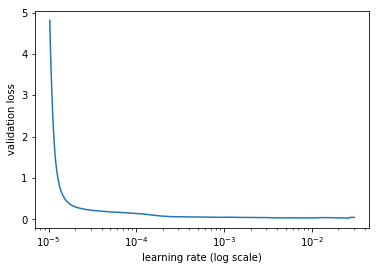

In [100]:
model.sched.plot()

In [101]:
lr = 1e-4

In [102]:
model.fit(lr, 3, metrics=[exp_rmspe])

  5%|▌         | 266/4948 [00:06<01:47, 43.56it/s, loss=0.158]
epoch      trn_loss   val_loss   exp_rmspe                      
    0      0.026369   0.039671   0.218973  
    1      0.015981   0.035616   0.223509                       
    2      0.01308    0.029302   0.195554                       



[array([0.0293]), 0.19555376806813188]

In [103]:
model.fit(lr, 4, metrics=[exp_rmspe], cycle_len=1)

epoch      trn_loss   val_loss   exp_rmspe                      
    0      0.010802   0.026802   0.186368  
    1      0.011527   0.026507   0.185022                        
    2      0.009293   0.026482   0.185139                        
    3      0.009252   0.026413   0.184781                        



[array([0.02641]), 0.18478079757727436]

In [104]:
model.fit(lr, 2, metrics=[exp_rmspe], cycle_len=4)

epoch      trn_loss   val_loss   exp_rmspe                       
    0      0.009831   0.026967   0.186318  
    1      0.009253   0.026672   0.185631                        
    2      0.008587   0.026352   0.185077                        
    3      0.007885   0.026131   0.184063                        
    4      0.008515   0.027629   0.190706                        
    5      0.008564   0.024482   0.17422                         
    6      0.008226   0.026508   0.185802                        
    7      0.007697   0.0259     0.183081                        



[array([0.0259]), 0.18308104726443067]

## Test Data

In [105]:
x, y = model.predict_with_targs()

In [106]:
exp_rmspe(x, y)

0.26150484026081716

In [107]:
pred_test = model.predict(True)

In [108]:
pred_test = np.exp(pred_test)

In [109]:
joined_test['Sales']=pred_test

In [110]:
joined_test[['Id','Sales']].to_csv('tmp.csv', index=False)